## Kaggle Dataset의 일부를 이용한 개, 고양이 구분ㅡ

### Dog Image 1,111개, Cat Image 1111개 총 2,222개

In [1]:
import numpy as np
import tensorflow as tf
import os, cv2, random
import matplotlib.pyplot as plt
from glob import glob
from tensorflow import keras
from keras.preprocessing import image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
path='../dataset/cat_and_dog/train/'

In [4]:
## used for resize and in our model
ROW, COL=96, 96
dogs, cats=[],[]
y_dogs, y_cats=[],[]

In [5]:
# 1,111개 이미지
dog_path=os.path.join(path, 'dog.5*')
cat_path=os.path.join(path, 'cat.5*')
len(glob(dog_path))

1111

In [6]:
## Load some our dog image
for dog_img in glob(dog_path):
    dog=cv2.imread(dog_img)
    dog=cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)
    dog=cv2.resize(dog, (ROW, COL))
    dog=image.img_to_array(dog)
    dogs.append(dog)

In [7]:
## Load some our dog image
for cat_img in glob(cat_path):
    cat=cv2.imread(cat_img)
    cat=cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
    cat=cv2.resize(cat, (ROW, COL))
    cat=image.img_to_array(cat)
    cats.append(cat)

In [8]:
classes=['dog','cat']

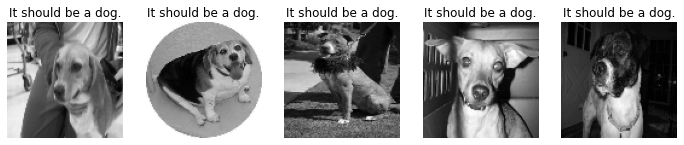

In [9]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1,5,i+1)
    img=image.array_to_img(random.choice(dogs))
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))
plt.show()

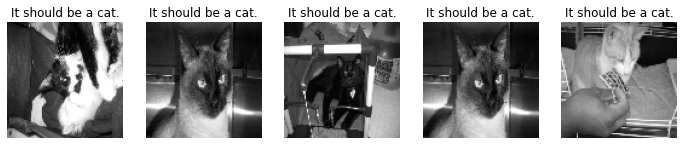

In [10]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1,5,i+1)
    img=image.array_to_img(random.choice(cats))
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [11]:
dogs[:5]

[array([[[138.],
         [210.],
         [103.],
         ...,
         [ 93.],
         [122.],
         [ 77.]],
 
        [[143.],
         [ 87.],
         [221.],
         ...,
         [ 68.],
         [ 73.],
         [ 96.]],
 
        [[108.],
         [193.],
         [223.],
         ...,
         [ 96.],
         [113.],
         [104.]],
 
        ...,
 
        [[199.],
         [200.],
         [199.],
         ...,
         [ 93.],
         [ 74.],
         [ 94.]],
 
        [[190.],
         [195.],
         [201.],
         ...,
         [ 94.],
         [ 80.],
         [106.]],
 
        [[188.],
         [192.],
         [184.],
         ...,
         [ 93.],
         [100.],
         [108.]]], dtype=float32),
 array([[[ 64.],
         [ 71.],
         [113.],
         ...,
         [191.],
         [217.],
         [177.]],
 
        [[ 46.],
         [ 52.],
         [ 81.],
         ...,
         [195.],
         [215.],
         [158.]],
 
        [[ 45.],
 

In [12]:
## just change the labels for 0 and 1
y_dogs=[1 for item in enumerate(dogs)]
y_cats=[0 for item in enumerate(cats)]

In [13]:
y_dogs[:5]

[1, 1, 1, 1, 1]

In [14]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [15]:
x_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [16]:
len(y_train)

2222

In [17]:
## One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 2)

In [18]:
x_train.shape

(2222, 96, 96, 1)

In [19]:
## used for resize and in our model
ROW, COL=96, 96
dogs, cats=[],[]
y_dogs, y_cats=[],[]

In [20]:
# 611개 이미지
dog_path=os.path.join(path, 'dog.12*')
cat_path=os.path.join(path, 'cat.12*')
len(glob(dog_path))

611

In [21]:
## Load some our dog image
for dog_img in glob(dog_path):
    dog=cv2.imread(dog_img)
    dog=cv2.cvtColor(dog,cv2.COLOR_BGR2GRAY)
    dog=cv2.resize(dog, (ROW, COL))
    dog=image.img_to_array(dog)
    dogs.append(dog)

In [22]:
## Load some our dog image
for cat_img in glob(cat_path):
    cat=cv2.imread(cat_img)
    cat=cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
    cat=cv2.resize(cat, (ROW, COL))
    cat=image.img_to_array(cat)
    cats.append(cat)

In [23]:
classes=['dog','cat']

In [24]:
## just change the labels for 0 and 1
y_dogs=[1 for item in enumerate(dogs)]
y_cats=[0 for item in enumerate(cats)]

In [25]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [26]:
x_test = np.concatenate((dogs,cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [27]:
## One-Hot Encoding
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [28]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)       

In [29]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [30]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [31]:
model.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.2,
          callbacks=[checkpointer, early_stopping_callback])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1777/1777 [==============================] - 36s 20ms/step - loss: 0.6773 - accuracy: 0.6196 - val_loss: 0.9807 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.98067, saving model to model/dogs_vs_cats-cnn-01-0.9807.hdf5
Epoch 2/40
1777/1777 [==============================] - 36s 20ms/step - loss: 0.6595 - accuracy: 0.6252 - val_loss: 0.9870 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 0.98067
Epoch 3/40
1777/1777 [==============================] - 36s 20ms/step - loss: 0.6475 - accuracy: 0.6292 - val_loss: 0.7396 - val_accuracy: 0.4539

Epoch 00003: val_loss improved from 0.98067 to 0.73956, saving model to model/dogs_vs_cats-cnn-03-0.7396.hdf5
Epoch 4/40
1777/1777 [==============================] - 35s 20ms/step - loss: 0.6268 - accuracy: 0.6579 - val_loss: 0.9839 - val_accuracy: 0.2180

Epoch 00004: val_loss did not improve from 0.73956
Epoch 5/40
1777/1777 [=================

In [34]:
del model
model = load_model('model/dogs_vs_cats-cnn-05-0.6987.hdf5')

In [35]:
scores = model.evaluate(x_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

MODEL ACCURACY: 0.63339
